<a href="https://colab.research.google.com/github/FairozAhmadSheikh/Tensor_Flow/blob/main/02_Neural_Network_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.20.0


In [3]:
# Creating features
X=tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

In [4]:
# Create Labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

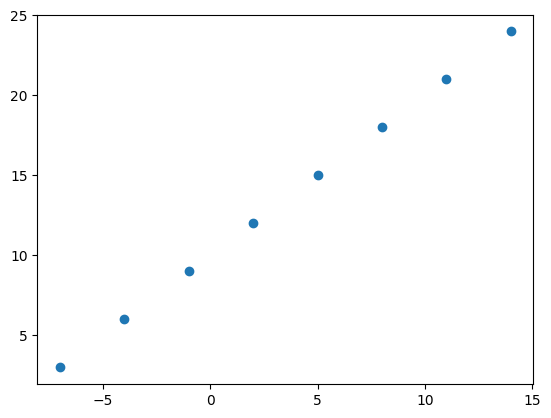

In [5]:
# Visulize it
plt.scatter(X,y)


# **Create a  demo tensor for our housing price prediction problem**

In [6]:
house_info=tf.constant(['bedroom','bathroom','garaage'])
house_price=tf.constant([971325])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garaage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([971325], dtype=int32)>)

In [7]:
input_shape=X.shape
output_shape=y.shape

input_shape,output_shape

(TensorShape([8]), (8,))

In [8]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape,output_shape

(TensorShape([]), ())

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>, np.float64(3.0))

# **Neural Net Building**

In [11]:
tf.random.set_seed(42)

# create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 19.5701 - mae: 19.5701
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 19.2889 - mae: 19.2889
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 19.0076 - mae: 19.0076
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - loss: 18.7264 - mae: 18.7264
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - loss: 18.4451 - mae: 18.4451


In [12]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


array([[-17.584152]], dtype=float32)

# **Improve models perfromance**
HyperParameter Tuning


In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=101)

Epoch 1/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14.0350 - mae: 14.0350
Epoch 2/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 13.4573 - mae: 13.4573
Epoch 3/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 12.9281 - mae: 12.9281
Epoch 4/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 12.4216 - mae: 12.4216
Epoch 5/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 11.8959 - mae: 11.8959
Epoch 6/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 11.3323 - mae: 11.3323
Epoch 7/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 10.7202 - mae: 10.7202
Epoch 8/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 10.0423 - mae: 10.0423
Epoch 9/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 9.2732 - mae: 9.2732
Epoch 10/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 8.3947 - mae: 8.3947
Epoch 11/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 7.3638 - mae: 7.3638
Epoch 12/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 6.1254 - mae: 6.1254
Epoch 13/101
1/1 ━━━━━━━━━━

In [14]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


array([[33.579475]], dtype=float32)

In [15]:
# again hyperparamter tuning

model=tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mse'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=90)

Epoch 1/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 152.9669 - mse: 152.9669
Epoch 2/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 82.5155 - mse: 82.5155
Epoch 3/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 39.5088 - mse: 39.5088
Epoch 4/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 26.1598 - mse: 26.1598
Epoch 5/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 48.9605 - mse: 48.9605
Epoch 6/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 53.9608 - mse: 53.9608
Epoch 7/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 37.8410 - mse: 37.8410
Epoch 8/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 22.6831 - mse: 22.6831
Epoch 9/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 17.4569 - mse: 17.4569
Epoch 10/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 19.9145 - mse: 19.9145
Epoch 11/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 24.6493 - mse: 24.6493
Epoch 12/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 27.9664 - mse: 27.9664
Epoch 13/90
1/1 ━━━━━━━━━━━

In [16]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


array([[27.17167]], dtype=float32)

# **Making Dataset Bigger**

In [17]:
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

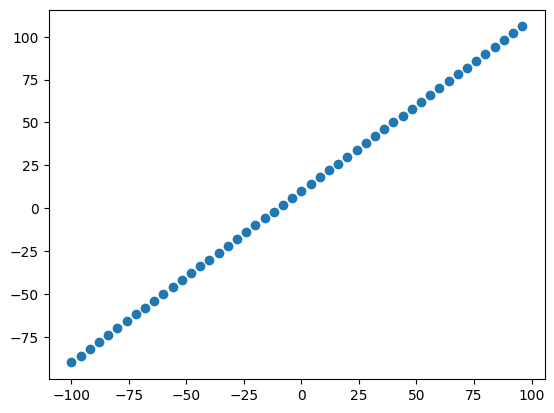

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

# **Train Test Split**
* Three Sets
> Training , Validation and Test Set

In [20]:
# Split data into train and test set
len(X)

50

In [21]:
X_train=X[:40]   # 80% for training purpose
y_train=y[:40]

X_test=X[40:]   # 20 % for testing
y_test=y[40:]


# **Visualize the Data**

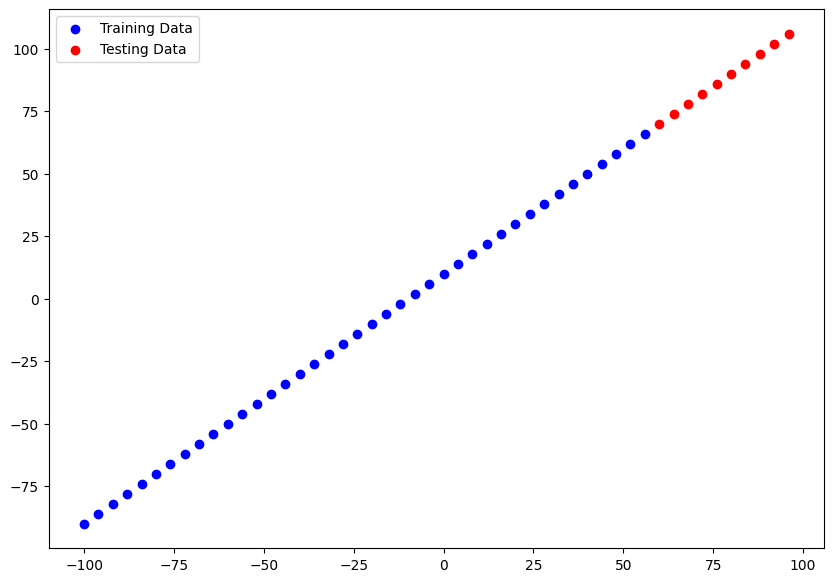

In [22]:
plt.figure(figsize=(10,7))

# plot training data
plt.scatter(X_train,y_train,c='b',label='Training Data')

# plot test data
plt.scatter(X_test,y_test,c='r',label='Testing Data')

plt.legend();

In [23]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.summary()

C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 61.3041 - mae: 61.3041  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 27.0654 - mae: 27.0654
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 9.9861 - mae: 9.9861 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.4375 - mae: 11.4375
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.9526 - mae: 8.9526
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.0620 - mae: 10.0620
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.5672 - mae: 11.5672
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.0285 - mae: 9.0285
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.1379 - mae: 10.1379
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.7261 - mae: 11.7261
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.5036 - mae: 12.5036
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.3311 - mae: 8.3311
Epoch 13/100
2/2 ━━━━━━━━━━━━

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [26]:
len(X_train)

40

In [27]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(40,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(20,name='hidden_layer1'),
    tf.keras.layers.Dense(10,name='hidden_laye2r'),
    tf.keras.layers.Dense(1,name='Output_Layer')
],name='model_1')

In [28]:
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mse'])

In [29]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [30]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 40)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer1 (Dense)           │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_laye2r (Dense)           │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.15 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,244 (8.77 KB)

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


array([[ 70.00962 ],
       [ 74.009834],
       [ 78.01005 ],
       [ 82.01026 ],
       [ 86.01047 ],
       [ 90.01068 ],
       [ 94.01088 ],
       [ 98.01109 ],
       [102.01131 ],
       [106.01151 ]], dtype=float32)

In [33]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(X_test,y_test,c='b',label='Testing Data')
  plt.scatter(X_train,y_train,c='g',label='Training Data')
  plt.plot(X_test,y_pred,c='r',label='Predictions')
  plt.legend();

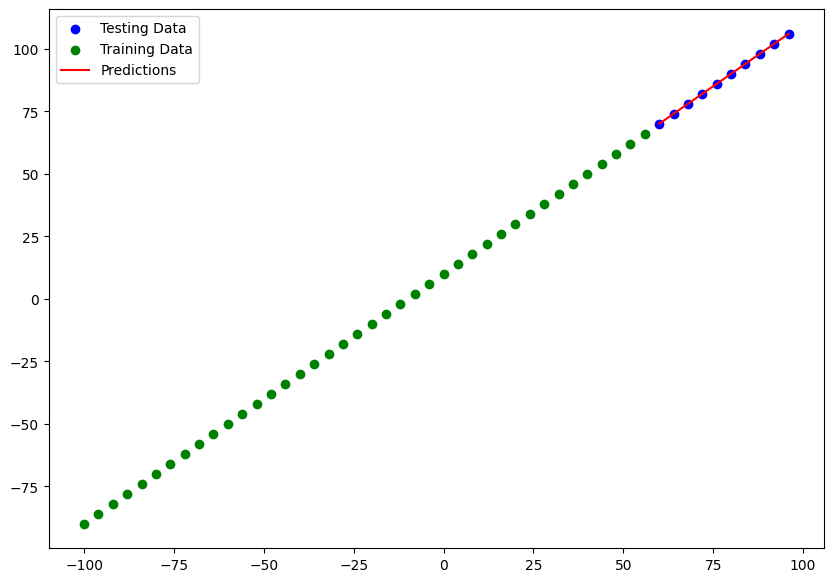

In [34]:
plot_predictions()

# **Evalvating Model**
MAE, MSE , HUBER

In [35]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 1.1210e-04 - mse: 1.1210e-04


[0.00011209943477297202, 0.00011209943477297202]

Mean Absolute Error

In [44]:
tf.keras.losses.MAE(y_test,tf.squeeze(y_pred)).numpy()

np.float32(0.010570526)

Mean Squared Error

In [47]:
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred)).numpy()

np.float32(0.000112099435)

Some Functions to reuse MAE AND MSE

In [48]:
def mae(y_true,y_pred):
    return tf.keras.losses.MAE(y_true,tf.squeeze(y_pred))
def mse(y_true,y_pred):
    return tf.keras.losses.MSE(y_true,tf.squeeze(y_pred))

**Running Experiments to improve our model**

* get more data
* make model larger
* train model more longer

**Lets do 3 modelling experiments right now**

* model1: same as orignal 1 layer , 100 epochs
* model2: same as orignal 2 layer , 100 epochs
* model3: same as orignal 2 layer , 500 epochs

In [49]:
# model 1 

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_1.fit(X_train,y_train,epochs=100)


Epoch 1/100


C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 30.8440 - mae: 30.8440
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 30.7605 - mae: 30.7605
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 30.6771 - mae: 30.6771
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 30.5938 - mae: 30.5938
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 30.5104 - mae: 30.5104
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 30.4270 - mae: 30.4270
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 30.3436 - mae: 30.3436 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 30.2602 - mae: 30.2602
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 30.1769 - mae: 30.1769
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 30.0935 - mae: 30.0935 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 30.0101 - mae: 30.0101
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 29.9267 - mae: 29.9267
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


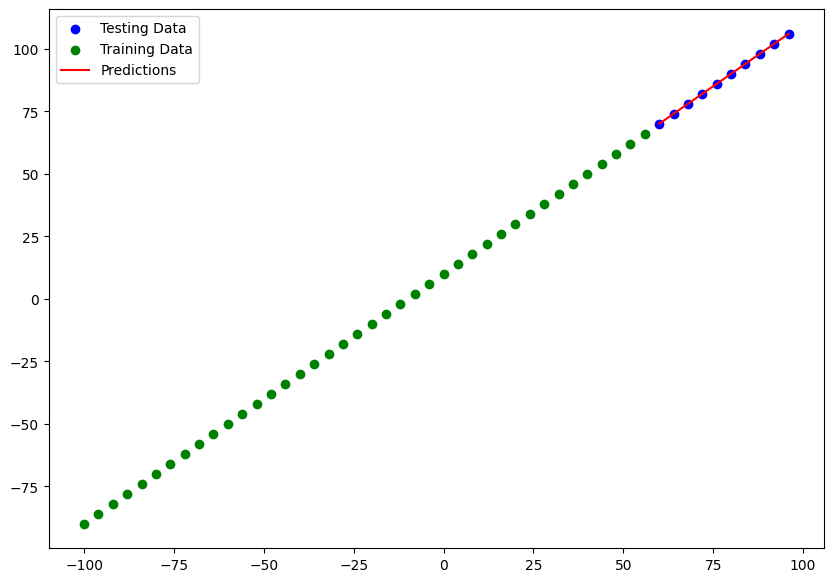

In [50]:
y_pred1=model_1.predict(X_test)
plot_predictions(predictions=y_pred1)

In [51]:
mae_1=mae(y_test,y_pred1)
mse_1=mae(y_test,y_pred1)

In [52]:
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=54.0535774230957>,
 <tf.Tensor: shape=(), dtype=float32, numpy=54.0535774230957>)

In [ ]:
a